## 1.项目背景

本文主要通过分析CDNow网站的用户购买明细来分析该网站的用户消费行为，使运营部门在营销时更加具有针对性，从而节省成本，提升效率。

## 2.数据来源

CDNow网站的用户在1997年1月1日至1998年6月30日期间内购买CD交易明细。  

数据集一共有用户ID，购买日期，订单数，订单金额四个字段。

## 3.分析思路
![项目分析思路](项目分析思路.png)

## 4.导入数据

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
from datetime import datetime
plt.style.use('ggplot') 
%matplotlib inline

In [2]:
columns = ['用户ID','购买日期','订单数','订单金额']
data = pd.read_csv("CDNOW_master.txt",names = columns,sep = '\s+')

### 数据描述

In [3]:
data.head()

,用户ID,购买日期,订单数,订单金额
0,1,19970101,1,11.77
1,2,19970112,1,12.00
2,2,19970112,5,77.00
3,3,19970102,2,20.76
4,3,19970330,2,20.76


In [4]:
data.dtypes

用户ID      int64
购买日期      int64
订单数       int64
订单金额    float64
dtype: object

In [5]:
# 缺省值情况
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69659 entries, 0 to 69658
Data columns (total 4 columns):
用户ID    69659 non-null int64
购买日期    69659 non-null int64
订单数     69659 non-null int64
订单金额    69659 non-null float64
dtypes: float64(1), int64(3)
memory usage: 2.1 MB


In [6]:
data.describe()

,用户ID,购买日期,订单数,订单金额
count,69659.000000,6.965900e+04,69659.000000,69659.000000
mean,11470.854592,1.997228e+07,2.410040,35.893648
std,6819.904848,3.837735e+03,2.333924,36.281942
min,1.000000,1.997010e+07,1.000000,0.000000
25%,5506.000000,1.997022e+07,1.000000,14.490000
50%,11410.000000,1.997042e+07,2.000000,25.980000
75%,17273.000000,1.997111e+07,3.000000,43.700000
max,23570.000000,1.998063e+07,99.000000,1286.010000


### 数据清洗

In [7]:
## 时间日期转换
data['购买日期'] = pd.to_datetime(data.购买日期,format =  '%Y%m%d')
data['月份'] = data.购买日期.values.astype('datetime64[M]') 
data.head()

,用户ID,购买日期,订单数,订单金额,月份
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-01
2,2,1997-01-12,5,77.00,1997-01-01
3,3,1997-01-02,2,20.76,1997-01-01
4,3,1997-03-30,2,20.76,1997-03-01


### 用户消费行为静态分析

In [8]:
# 根据用户id进行分组
group_user = data.groupby('用户ID').sum()
group_user.describe()


,订单数,订单金额
count,23570.000000,23570.000000
mean,7.122656,106.080426
std,16.983531,240.925195
min,1.000000,0.000000
25%,1.000000,19.970000
50%,3.000000,43.395000
75%,7.000000,106.475000
max,1033.000000,13990.930000


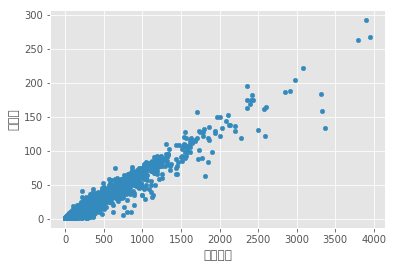

In [9]:
#查询条件：订单金额 < 4000
group_user.query('订单金额 < 4000').plot.scatter(x='订单金额',y='订单数')

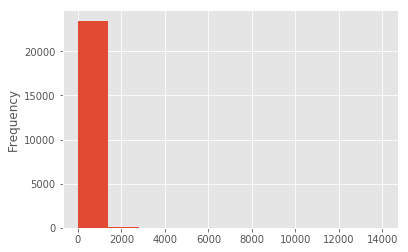

In [10]:
group_user.订单金额. plot.hist(bins = 10)
#bins = 10,就是分成10块，最高金额是14000，每个项就是700

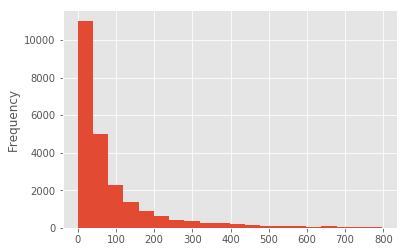

In [11]:
group_user.query("订单金额< 800")['订单金额'].plot.hist(bins=20)

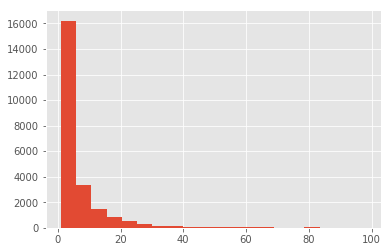

In [12]:
group_user.query('订单数 < 100').订单数.hist(bins = 20)

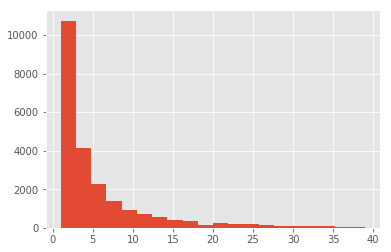

In [13]:
group_user.query('订单数 < 40 ').订单数.hist(bins = 20)

### 用户消费行为动态分析

In [14]:
#每个用户的每次购买时间间隔
order_time = data.groupby('用户ID').apply(lambda x:x['购买日期'] - x['购买日期'].shift())
order_time.head(10)

用户ID   
1     0        NaT
2     1        NaT
      2     0 days
3     3        NaT
      4    87 days
      5     3 days
      6   227 days
      7    10 days
      8   184 days
4     9        NaT
Name: 购买日期, dtype: timedelta64[ns]

In [17]:
#解决中文显示参数设置
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

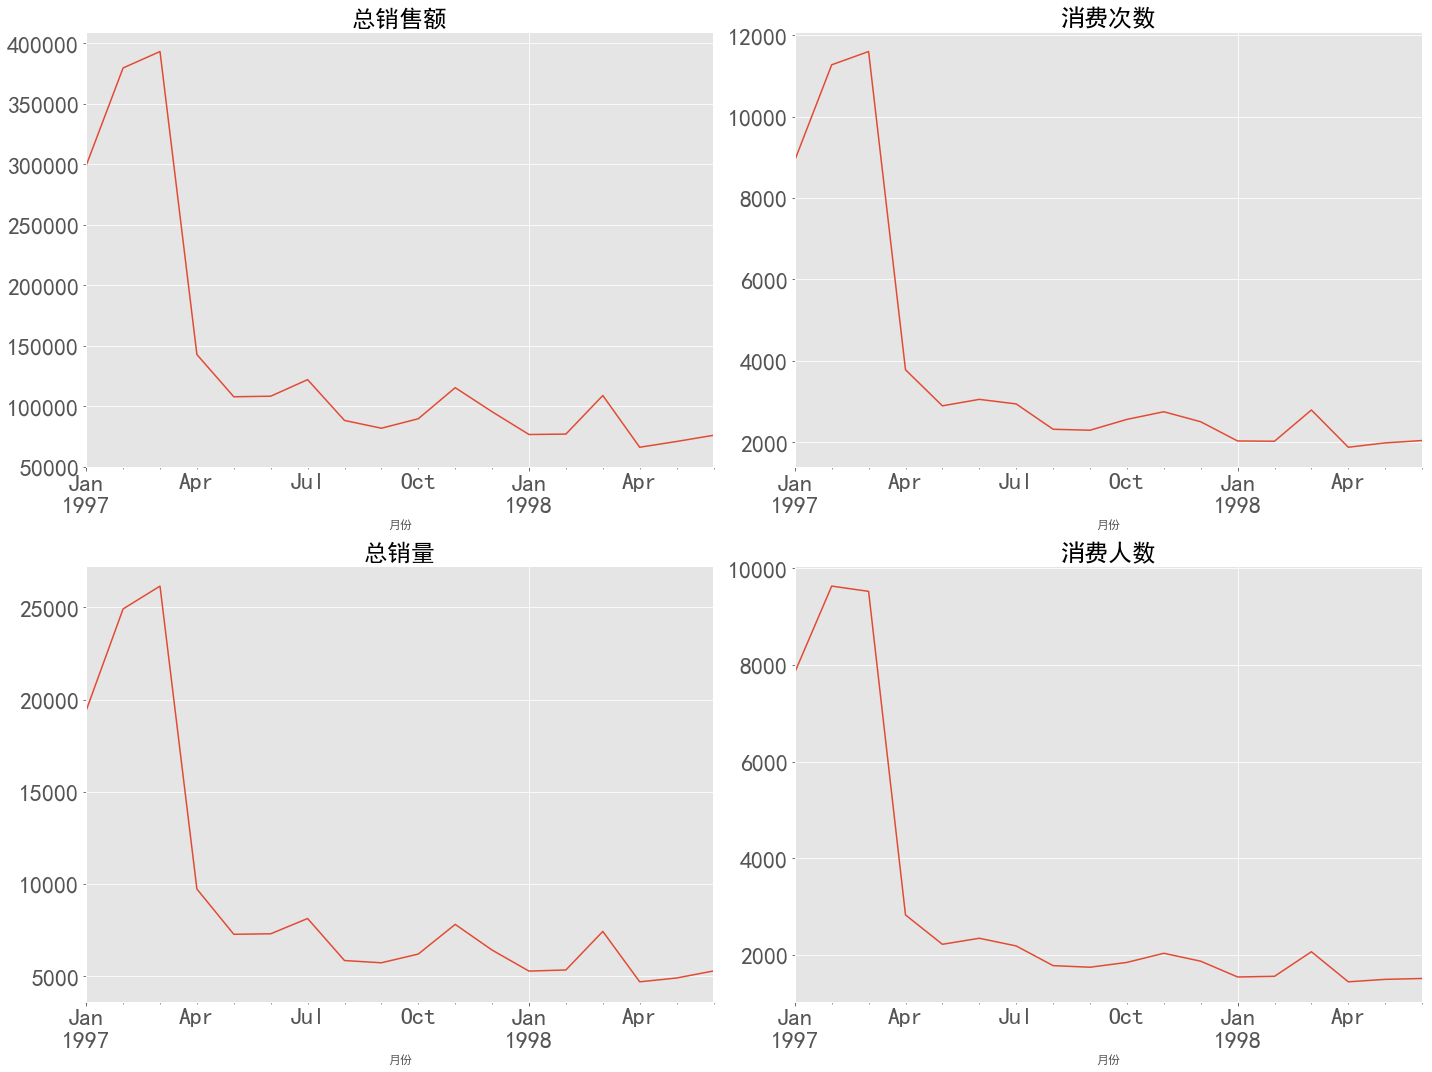

In [18]:
# 设置图的大小，添加子图
plt.figure(figsize=(20,15))
# 每月的总销售额
plt.subplot(221)
data.groupby('月份')['订单金额'].sum().plot(fontsize=24) 
plt.title('总销售额',fontsize=24) 

#每月的消费次数
plt.subplot(222)
data.groupby('月份')['购买日期'].count().plot(fontsize=24)
plt.title('消费次数',fontsize=24) 

#每月的销量
plt.subplot(223)
data.groupby('月份')['订单数'].sum().plot(fontsize=24)
plt.title('总销量',fontsize=24)

#每月的消费人数
plt.subplot(224)
data.groupby('月份')['用户ID'].apply(lambda x:len(x.unique())).plot(fontsize=24)
plt.title('消费人数',fontsize=24)
plt.tight_layout() # 设置子图的间距
plt.show()

In [15]:
order_time.describe()

count                      46089
mean     68 days 23:22:13.567662
std      91 days 00:47:33.924168
min              0 days 00:00:00
25%             10 days 00:00:00
50%             31 days 00:00:00
75%             89 days 00:00:00
max            533 days 00:00:00
Name: 购买日期, dtype: object

Text(0.5, 1.0, '用户消费周期分布图')

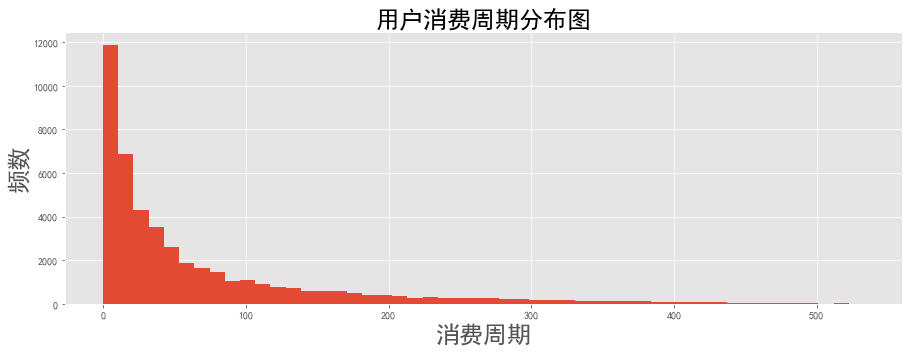

In [19]:
plt.figure(figsize=(15,5))
plt.hist((order_time / np.timedelta64(1, 'D')).dropna(), bins = 50)
plt.xlabel('消费周期',fontsize=24)
plt.ylabel('频数',fontsize=24)
plt.title('用户消费周期分布图',fontsize=24)

In [20]:
orderdt_min=data.groupby('用户ID').购买日期.min()#第一次消费
orderdt_max=data.groupby('用户ID').购买日期.max()#最后一次消费
(orderdt_max-orderdt_min).head()

用户ID
1     0 days
2     0 days
3   511 days
4   345 days
5   367 days
Name: 购买日期, dtype: timedelta64[ns]

In [21]:
(orderdt_max-orderdt_min).mean()

Timedelta('134 days 20:55:36.987696')

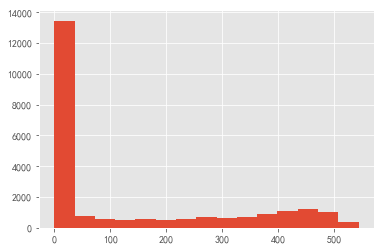

In [22]:
((orderdt_max-orderdt_min)/np.timedelta64(1,'D')).hist(bins=15)

In [23]:
#计算所有消费过两次以上的老客的生命周期
life_time = (orderdt_max - orderdt_min).reset_index()
life_time.head()

,用户ID,购买日期
0,1,0 days
1,2,0 days
2,3,511 days
3,4,345 days
4,5,367 days


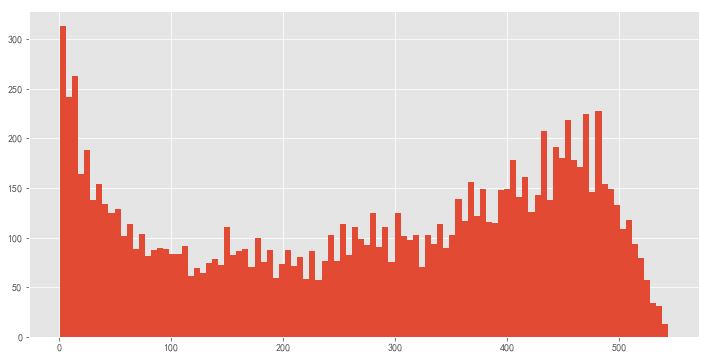

In [24]:
#用户生命周期分布图
plt.figure(figsize=(10,5))
life_time['life_time'] = life_time.购买日期 / np.timedelta64(1,'D')
life_time[life_time.life_time > 0].life_time.hist(bins = 100, figsize = (12,6))

In [25]:
#去掉0天生命周期的用户之后的用户生命周期的平均值
life_time[life_time.life_time>0].购买日期.mean()

Timedelta('276 days 01:04:31.344216')

## 用户分层 RFM

In [28]:
rfm = data.pivot_table(index = '用户ID',
                     values = ['订单金额','购买日期','订单数'],
                     aggfunc = {'订单金额':'sum',
                                '购买日期':'max',
                                '订单数':'sum'})
rfm.head()

# 日期的最大值与当前日期的差值为R
rfm['R'] = (rfm['购买日期'].max() - rfm['购买日期']) / np.timedelta64(1,'D')
rfm.rename(columns = {'订单金额':'M',
                     '订单数':'F'},
          inplace=True)

# 构建rfm模型公式
def get_rfm(x):
    level = x.apply(lambda x:'1' if x>=0 else '0')
    label = level['R'] + level['F'] + level['M']
    d = {'111':'重要价值客户',
        '011':'重要保持客户',
        '101':'重要挽留客户',
        '001':'重要发展客户',
        '110':'一般价值客户',
        '010':'一般保持客户',
        '100':'一般挽留客户',
        '000':'一般发展客户'}
    
    result = d[label]
    return result
rfm['label'] = rfm[['R','F','M']].apply(lambda x:(x-x.mean()) / x.std()).apply(get_rfm,axis=1)
rfm.head()
#求和
rfm.groupby('label').sum()

,F,M,R
label,,,
一般价值客户,650,7181.28,36295.0
一般保持客户,1712,19937.45,29448.0
一般发展客户,13977,196971.23,591108.0
一般挽留客户,29346,438291.81,6951815.0
重要价值客户,11121,167080.83,358363.0
重要保持客户,107789,1592039.62,517267.0
重要发展客户,2023,45785.01,56636.0
重要挽留客户,1263,33028.40,114482.0


In [29]:
rfm.groupby('label').size()

label
一般价值客户       77
一般保持客户      206
一般发展客户     3300
一般挽留客户    14074
重要价值客户      787
重要保持客户     4554
重要发展客户      331
重要挽留客户      241
dtype: int64

In [30]:
#将用户消费数据进行数据透视：
#用户活跃程度分层
#将用户消费数据进行数据透视：
data1 = data.pivot_table(index = "用户ID",
                     columns = "月份",
                     values = '购买日期',
                     aggfunc = 'count').fillna(0)
data1.head() 

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [32]:
data2 = data1.applymap(lambda x:1 if x>0 else 0)
data2.tail()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
23566,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23567,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23568,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23569,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23570,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
def active_status(data):
    status=[]
    for i in range(18): #共18个月
        
        #若本月没有消费
        if data[i]==0:
            if len(status)>0:#前面某月消费过，是老客
                if status[i-1]=='unreg':#前一个月不是首次消费，不是新客
                    status.append('unreg')#则本月也不是新客
                else:
                    status.append('unactive')#前一个月是首次消费，属于新客，则本月为不活跃用户
            else:
                status.append('unreg')#前面某月没有消费过，则本月也不是新客
         #若本月消费
        else:
            if len(status)==0:#前面没有消费过
                status.append('new')#则为新客
            else:#前面消费过
                if status[i-1] =='unactive':#前一个月没有消费，是不活跃用户
                    status.append('return')#本月为回流用户
                elif status[i-1]=='unreg':#前一个月没有消费，不是新客
                    status.append('new')
                else:#前一个月是首次消费
                    status.append('active')#本月为活跃用户
                    
    return status

In [34]:
#可得到一张不同用户在不同月份的不同状态（new=新、active=活跃、return=回流、unactive=流失）,unreg相当于未注册，指这个用户在这个月及以前从未购买过产品，主要为了统计起来更加方便而加进去。
indexs=data['月份'].sort_values().astype('str').unique()
data3=data2.apply(lambda x:pd.Series(active_status(x),index=indexs),axis=1)
data3.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
2,new,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive,unactive
3,new,unactive,return,active,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,return,unactive
4,new,unactive,unactive,unactive,unactive,unactive,unactive,return,unactive,unactive,unactive,return,unactive,unactive,unactive,unactive,unactive,unactive
5,new,active,unactive,return,active,active,active,unactive,return,unactive,unactive,return,active,unactive,unactive,unactive,unactive,unactive


In [35]:
#把unreg替换成NaN，再用fillna(0)把空值填为0。然后转置，把月份作为索引行，状态作为列，得到如下的表
data4=data3.replace('unreg',np.NaN).apply(lambda x:pd.value_counts(x)).fillna(0).T
data4

,active,new,return,unactive
1997-01-01,0.0,7846.0,0.0,0.0
1997-02-01,1157.0,8476.0,0.0,6689.0
1997-03-01,1681.0,7248.0,595.0,14046.0
1997-04-01,1773.0,0.0,1049.0,20748.0
1997-05-01,852.0,0.0,1362.0,21356.0
1997-06-01,747.0,0.0,1592.0,21231.0
1997-07-01,746.0,0.0,1434.0,21390.0
1997-08-01,604.0,0.0,1168.0,21798.0
1997-09-01,528.0,0.0,1211.0,21831.0
1997-10-01,532.0,0.0,1307.0,21731.0


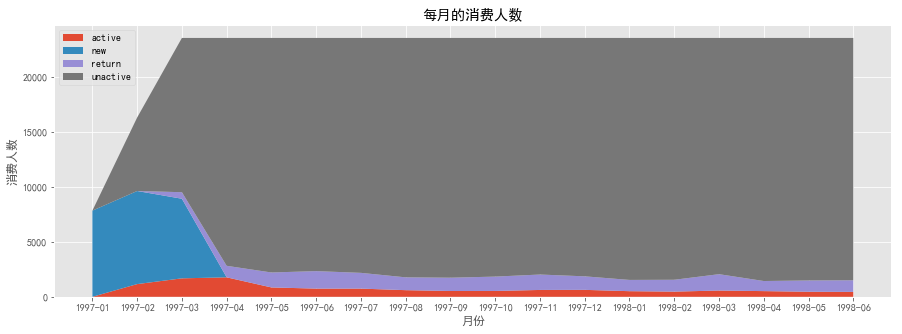

In [36]:
#作出非堆积效果图：
u =data4.reset_index()
labels = u[['active','new','return','unactive']].columns
plt.figure(figsize=(15,5))
plt.stackplot(u['index'].astype(str).apply(lambda x:x[:-3]), u['active'],u['new'],u['return'],u['unactive'], labels=labels)
plt.xlabel('月份')
plt.ylabel('消费人数')
plt.title('每月的消费人数')
plt.legend(loc = 'upper left')

In [37]:
data5=data4.apply(lambda x:x/x.sum(),axis=1)#每一层用户占总用户的比例
data5

,active,new,return,unactive
1997-01-01,0.000000,1.000000,0.000000,0.000000
1997-02-01,0.070886,0.519299,0.000000,0.409815
1997-03-01,0.071319,0.307510,0.025244,0.595927
1997-04-01,0.075223,0.000000,0.044506,0.880272
1997-05-01,0.036148,0.000000,0.057785,0.906067
1997-06-01,0.031693,0.000000,0.067543,0.900764
1997-07-01,0.031650,0.000000,0.060840,0.907510
1997-08-01,0.025626,0.000000,0.049555,0.924820
1997-09-01,0.022401,0.000000,0.051379,0.926220
1997-10-01,0.022571,0.000000,0.055452,0.921977


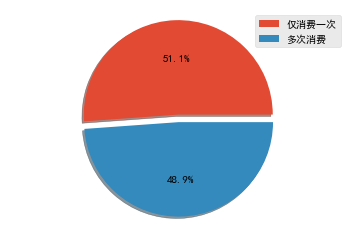

In [38]:
a = data.groupby('用户ID')['购买日期'].agg(['min','max']).reset_index()
new_old = (a['min'] == a['max']).value_counts().values

plt.pie(x = new_old,
       autopct = '%.1f%%',
       shadow = True,
       explode = [0.08,0],
       textprops = {'fontsize' : 11})
plt.axis('equal') 
plt.legend(['仅消费一次','多次消费'])

In [39]:
#每个用户在每月的订单数
pivoted_data=data.pivot_table(index='用户ID',columns='月份',values='购买日期',#pivot_table透视表
                       aggfunc='count').fillna(0)#某些用户在某月没有消费过，用nan表示，这里用0填充

pivoted_data.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#转换：消费2次以上记为1，消费1次记为0，消费0次记为NAN  
#applymap针对dataframe所有数据
pivoted_data_transf=pivoted_data.applymap(lambda x: 1 if x>1 else np.nan if x==0 else 0)
pivoted_data_transf.head()

月份,1997-01-01 00:00:00,1997-02-01 00:00:00,1997-03-01 00:00:00,1997-04-01 00:00:00,1997-05-01 00:00:00,1997-06-01 00:00:00,1997-07-01 00:00:00,1997-08-01 00:00:00,1997-09-01 00:00:00,1997-10-01 00:00:00,1997-11-01 00:00:00,1997-12-01 00:00:00,1998-01-01 00:00:00,1998-02-01 00:00:00,1998-03-01 00:00:00,1998-04-01 00:00:00,1998-05-01 00:00:00,1998-06-01 00:00:00
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '复购率的变化')

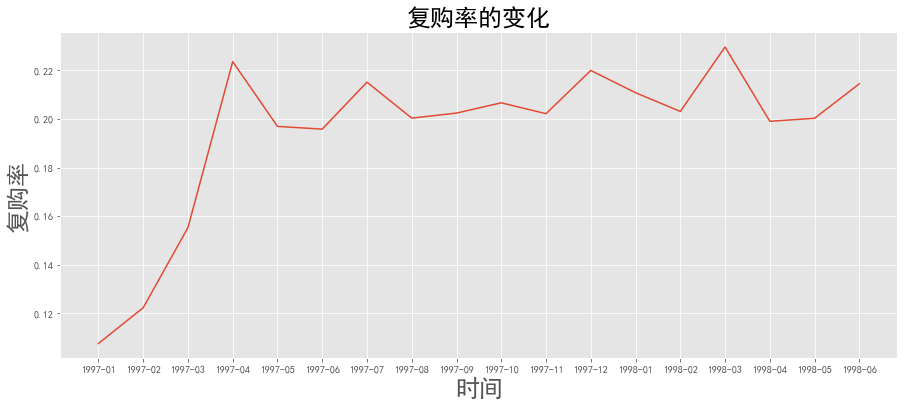

In [42]:
#count统计所有非空数据个数表示总消费用户数，sum计算非0数据的和表示消费两次以上的用户数
data_duplicate =pd.DataFrame(pivoted_data_transf.sum()/pivoted_data_transf.count()).reset_index()
data_duplicate.columns = ['Date', 'DuplicatedRate']
data_duplicate['Date'] = data_duplicate.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,6))
plt.plot(data_duplicate.Date, data_duplicate.DuplicatedRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('复购率',fontsize=24)
# plt.ylim(0,1)
plt.title('复购率的变化',fontsize=24)

In [43]:
#回购率
#每个用户每个月平均消费金额
pivoted_money=data.pivot_table(index='用户ID',columns='月份',values='订单金额',
                             aggfunc='mean').fillna(0)

columns_month=data.月份.sort_values().astype('str').unique()
pivoted_money.columns=columns_month
pivoted_money.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,11.77,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
2,44.50,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.000,0.00,0.0,0.0,0.0,0.00,0.0
3,20.76,0.0,20.76,19.54,0.00,0.00,0.00,0.00,0.00,0.0,39.205,0.000,0.00,0.0,0.0,0.0,16.99,0.0
4,29.53,0.0,0.00,0.00,0.00,0.00,0.00,14.96,0.00,0.0,0.000,26.480,0.00,0.0,0.0,0.0,0.00,0.0
5,21.65,38.9,0.00,45.55,38.71,26.14,28.14,0.00,40.47,0.0,0.000,43.465,37.47,0.0,0.0,0.0,0.00,0.0


In [44]:
#将有消费的记为1，没有消费的记为0
pivoted_purchase=pivoted_money.applymap(lambda x:1 if x>0 else 0)
pivoted_purchase.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
5,1,1,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0


In [45]:
#如果本月进行消费，下月也进行消费，则记为1；如果下月没有消费，则记为0，若本月没有记为消费，则记为nan
def purchase_return(data):
    status=[]
    for i in range(17):#循环17个月
        if data[i]==1:#若本月消费
            if data[i+1]==1:#下个月也消费
                status.append(1)#就记为1
            if data[i+1]==0:#下个月不消费，就记为0
                status.append(0)
        else:
            status.append(np.nan)
    status.append(np.nan)
    return pd.Series(status, index=columns_month)

pivoted_purchase_return=pivoted_purchase.apply(purchase_return,axis=1)#axis=1表示计算方向在行的方向上，左右运算
pivoted_purchase_return.head()

,1997-01-01,1997-02-01,1997-03-01,1997-04-01,1997-05-01,1997-06-01,1997-07-01,1997-08-01,1997-09-01,1997-10-01,1997-11-01,1997-12-01,1998-01-01,1998-02-01,1998-03-01,1998-04-01,1998-05-01,1998-06-01
用户ID,,,,,,,,,,,,,,,,,,
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,NaN,1.0,1.0,1.0,0.0,NaN,0.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, '回购率的变化')

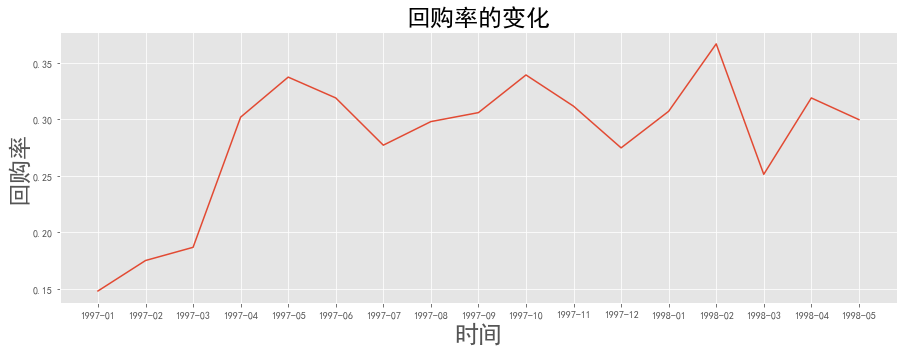

In [46]:
data_purchase = (pivoted_purchase_return.sum() / pivoted_purchase_return.count()).reset_index()
data_purchase.columns = ['Date', 'PurchaseRate']
data_purchase['Date'] = data_purchase.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,5))
plt.plot(data_purchase.Date, data_purchase.PurchaseRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('回购率', fontsize=24)
plt.title('回购率的变化', fontsize=24)

Text(0.5, 1.0, '回购率的变化')

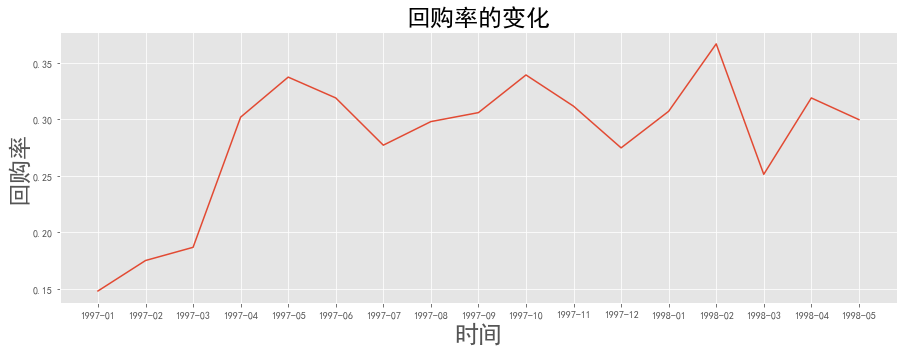

In [52]:
data_purchase = (pivoted_purchase_return.sum() / pivoted_purchase_return.count()).reset_index()
data_purchase.columns = ['Date', 'PurchaseRate']
data_purchase['Date'] = data_purchase.Date.astype(str).apply(lambda x:x[:-3])

plt.figure(figsize = (15,5))
plt.plot(data_purchase.Date, data_purchase.PurchaseRate)
plt.xlabel('时间', fontsize=24)
plt.ylabel('回购率', fontsize=24)
plt.title('回购率的变化', fontsize=24)

In [56]:
#分析留存率
#新建一个对象，并增加用户第一次消费时间的列,merge将两个dataframe合并
data_t=data[['用户ID','购买日期','订单数','订单金额']]
user_purchase_retention=pd.merge(left=data_t,right=orderdt_min.reset_index(),
how='inner',on='用户ID',suffixes=('','_min'))
user_purchase_retention.head(5)

,用户ID,购买日期,订单数,订单金额,购买日期_min
0,1,1997-01-01,1,11.77,1997-01-01
1,2,1997-01-12,1,12.00,1997-01-12
2,2,1997-01-12,5,77.00,1997-01-12
3,3,1997-01-02,2,20.76,1997-01-02
4,3,1997-03-30,2,20.76,1997-01-02


In [57]:
#每一次消费时间与第一次消费时间间隔
user_purchase_retention['order_date_time']=user_purchase_retention['购买日期']-user_purchase_retention['购买日期_min']
#将timedelta转换为数值型
user_purchase_retention['date_time']=user_purchase_retention.order_date_time.apply(lambda x:x/np.timedelta64(1,'D'))
user_purchase_retention.head(5)

,用户ID,购买日期,订单数,订单金额,购买日期_min,order_date_time,date_time
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0


In [60]:
#将时间间隔分桶（0-3）（3-7）等
bin=[0,3,7,15,30,60,90,180,365]
user_purchase_retention['date_time_bin']=pd.cut(user_purchase_retention.date_time,bins=bin)
user_purchase_retention.head(10)

,用户ID,购买日期,订单数,订单金额,购买日期_min,order_date_time,date_time,date_time_bin
0,1,1997-01-01,1,11.77,1997-01-01,0 days,0.0,NaN
1,2,1997-01-12,1,12.00,1997-01-12,0 days,0.0,NaN
2,2,1997-01-12,5,77.00,1997-01-12,0 days,0.0,NaN
3,3,1997-01-02,2,20.76,1997-01-02,0 days,0.0,NaN
4,3,1997-03-30,2,20.76,1997-01-02,87 days,87.0,"(60.0, 90.0]"
5,3,1997-04-02,2,19.54,1997-01-02,90 days,90.0,"(60.0, 90.0]"
6,3,1997-11-15,5,57.45,1997-01-02,317 days,317.0,"(180.0, 365.0]"
7,3,1997-11-25,4,20.96,1997-01-02,327 days,327.0,"(180.0, 365.0]"
8,3,1998-05-28,1,16.99,1997-01-02,511 days,511.0,NaN
9,4,1997-01-01,2,29.33,1997-01-01,0 days,0.0,NaN


In [61]:
#用户第一次消费之后，后续各时间段的消费总额
pivoted_retention=user_purchase_retention.pivot_table(index='用户ID',
columns='date_time_bin',values='订单金额',aggfunc=sum,dropna=False)
pivoted_retention.head()

date_time_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
用户ID                                                                   
1                 NaN     NaN      NaN       NaN       NaN       NaN   
2                 NaN     NaN      NaN       NaN       NaN       NaN   
3                 NaN     NaN      NaN       NaN       NaN      40.3   
4                 NaN     NaN      NaN     29.73       NaN       NaN   
5                 NaN     NaN    13.97       NaN      38.9       NaN   

date_time_bin  (90, 180]  (180, 365]  
用户ID                                  
1                    NaN         NaN  
2                    NaN         NaN  
3                    NaN       78.41  
4                    NaN       41.44  
5                  110.4      155.54  

In [62]:
pivoted_retention.mean()  # 各时间段的平均消费额

date_time_bin
(0, 3]        35.905798
(3, 7]        36.385121
(7, 15]       42.669895
(15, 30]      45.964649
(30, 60]      50.215070
(60, 90]      48.975277
(90, 180]     67.223297
(180, 365]    91.960059
dtype: float64

In [63]:
#1代表有消费，0代表没有
pivoted_retention_trans=pivoted_retention.applymap(lambda x:1 if x>0 else 0)
pivoted_retention_trans

date_time_bin  (0, 3]  (3, 7]  (7, 15]  (15, 30]  (30, 60]  (60, 90]  \
用户ID                                                                   
1                   0       0        0         0         0         0   
2                   0       0        0         0         0         0   
3                   0       0        0         0         0         1   
4                   0       0        0         1         0         0   
5                   0       0        1         0         1         0   
6                   0       0        0         0         0         0   
7                   0       0        0         0         0         0   
8                   0       0        0         0         1         0   
9                   0       0        0         0         0         0   
10                  0       0        0         0         0         0   
11                  0       0        0         1         0         1   
12                  0       0        0         0         0      

Text(0.5, 1.0, '留存率')

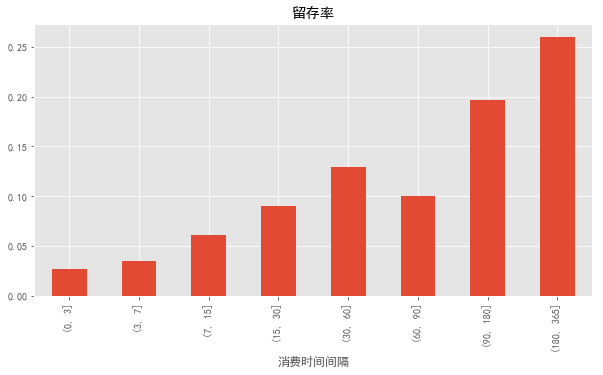

In [64]:
#每笔订单离第一笔订单的时间间隔
(pivoted_retention_trans.sum()/pivoted_retention_trans.count()).plot.bar(figsize=(10,5))
plt.xlabel('消费时间间隔')
plt.title('留存率')

Text(0.5, 1.0, '用户累计销售额贡献比')

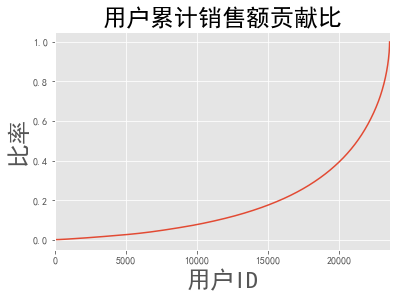

In [66]:
#先将用户消费金额按升序排列，逐行计算用户累计金额，最后一行是总消费金额
user_money=data.groupby('用户ID').订单金额.sum().sort_values().reset_index()
user_money['money_cumsum']=user_money.订单金额.cumsum()
money_total=user_money.money_cumsum.max()
#转行成百分比
user_money['prop']=user_money.apply(lambda x:x.money_cumsum/money_total,axis=1)#apply用在每个行上
user_money.tail()
user_money.prop.plot()
plt.xlabel('用户ID', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销售额贡献比', fontsize=24)

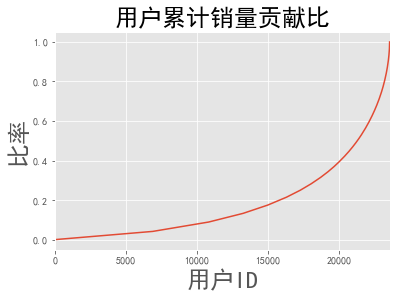

In [67]:
#先将用户销量按升序排列，逐行计算用户累计销量，最后一行是总销量
user_productsSum=data.groupby('用户ID').订单数.sum().sort_values().reset_index()
user_productsSum['products_cumsum']=user_productsSum.订单数.cumsum()
productsSum_total=user_productsSum.products_cumsum.max()
#转行成百分比
user_productsSum['prop']=user_productsSum.apply(lambda x:x.products_cumsum/productsSum_total,axis=1)#apply用在每个行上
user_productsSum.tail()
user_productsSum.prop.plot()
plt.xlabel('用户ID', fontsize=24)
plt.ylabel('比率', fontsize=24)
plt.title('用户累计销量贡献比', fontsize=24);